## Data Exploration and Visualization
We explore the data given in `data/wage.csv.gz` using
- [pandas](http://pandas.pydata.org/) and
- [seaborn](http://stanford.edu/~mwaskom/software/seaborn/) (hence [matplotlib](http://matplotlib.org/)).


### Preparation

In [1]:
# some imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
sns.set_style('whitegrid')
warnings.filterwarnings('ignore')
%matplotlib inline


### Load data

In [2]:
df = pd.read_csv('data/wage.csv.gz')
order = sorted(df['education'].unique())
hue_order = sorted(df['race'].unique())

In [3]:
df.head(3)

,Unnamed: 0,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177


In [4]:
df.columns

Index(['Unnamed: 0', 'year', 'age', 'sex', 'maritl', 'race', 'education',
       'region', 'jobclass', 'health', 'health_ins', 'logwage', 'wage'],
      dtype='object')

In [5]:
df.describe()[['age', 'wage']]

,age,wage
count,3000.000000,3000.000000
mean,42.414667,111.703608
std,11.542406,41.728595
min,18.000000,20.085537
25%,33.750000,85.383940
50%,42.000000,104.921507
75%,51.000000,128.680488
max,80.000000,318.342430


### How does wage depend on age?

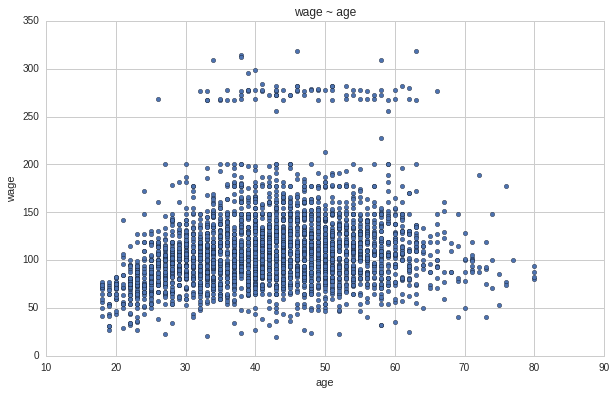

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))
df.plot.scatter(x='age', y='wage', title='wage ~ age', ax=ax)

In [7]:
median_wage = df.groupby('age')[['wage']].agg(np.median)
median_wage.head()

,wage
age,
18,69.619037
19,54.598150
20,71.482747
21,72.150456
22,75.043154


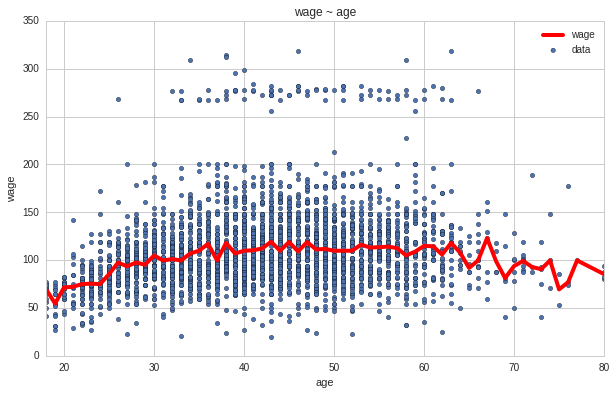

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
df.plot.scatter(x='age', y='wage', title='wage ~ age', label='data', ax=ax)
median_wage.plot.line(label='median', linewidth=4, color='r', ax=ax)
ax.legend()

### How does wage depend on education?

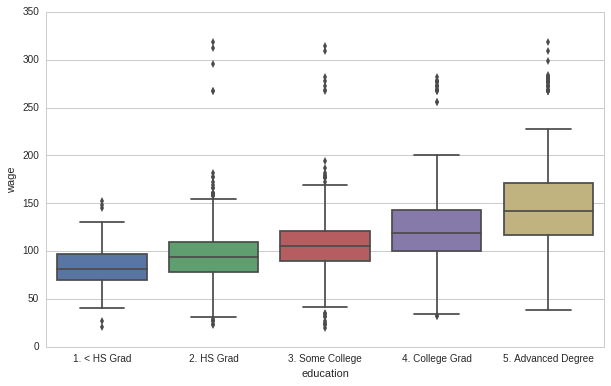

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(y='wage', x='education', data=df, 
            order=order, ax=ax)

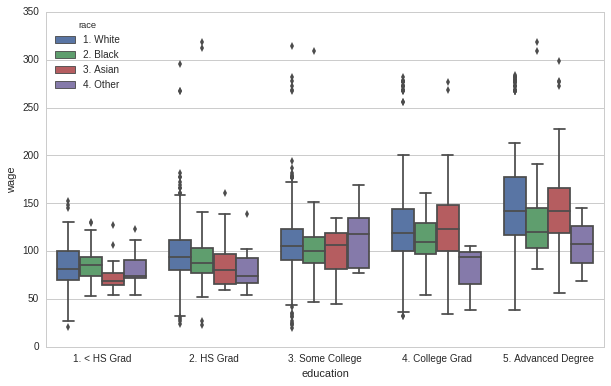

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(y='wage', x='education', hue='race', data=df, 
            order=order, hue_order=hue_order, ax=ax)

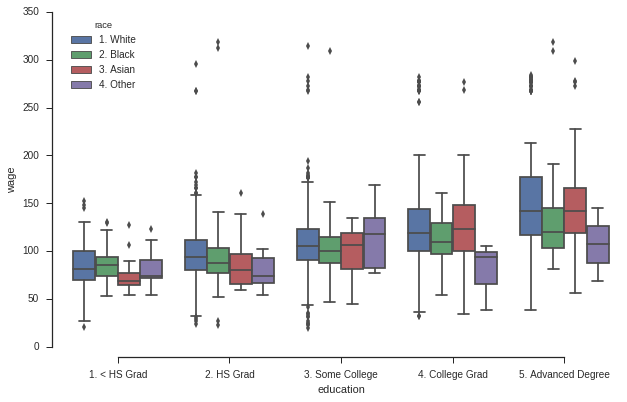

In [11]:
sns.set(style="ticks")
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(y='wage', x='education', hue='race', data=df, 
            order=order, hue_order=hue_order, ax=ax)
sns.despine(offset=10, trim=True)

In [12]:
df.groupby(['education', 'race'])[['wage']].agg(np.median)

wage
education          race                
1. < HS Grad       1. White   81.283253
                   2. Black   85.383940
                   3. Asian   68.748088
                   4. Other   73.775743
2. HS Grad         1. White   94.072715
                   2. Black   87.981033
                   3. Asian   79.854900
                   4. Other   73.775743
3. Some College    1. White  104.921507
                   2. Black   99.689464
                   3. Asian  105.903197
                   4. Other  118.015588
4. College Grad    1. White  118.884359
                   2. Black  109.354256
                   3. Asian  123.089700
                   4. Other   94.072715
5. Advanced Degree 1. White  141.775172
                   2. Black  119.740851
                   3. Asian  141.775172
                   4. Other  106.945844